# 什么样的顾客会选择离开（探索型数据分析）

## 1 背景 

一款名为《黑猫拼图》的游戏，和上月相比，本月的游戏用户数量减少了很多。但是，和上月相比，本月的商业宣传和月度活动并没有明显变化。因此，需要调查用户大量减少的原因并改善这种情况，该怎么做呢？

## 2 现状和预期

- **现状：和上月相比，本月的游戏用户数减少了很多**
- **前提：和上月相比，本月的商业宣传和月度活动无明显变化**
- **预期：将用户数量恢复到上月同等水平**

## 3 发现问题

为了明确现状和预期的差距，需要弄清楚本月和上月有哪些不同。此时，需要从宏观而不是具体数据来考虑问题的可能性。可以和市场部与研发部沟通，最后得到如下两个关键信息：
- **和上月相比，本月的商业宣传活动无明显变化，新增用户数也大致保持在相同的水平**
- **和上月相比，开展的游戏活动无明显变化** 

基于上述两个关键信息，发现外部的关键因素并没有导致游戏用户数量的波动，那么**假设**：**是否是某种属性（性别、年龄等）的用户群体数量减少了。**

**所以解决问题的方法就是探索是否是某种用户群体的数量减少了**

## 4 数据收集和加工

基于问题来搜集数据，问题：
- **和上月相比，本月的用户数量减少了（事实）**
- **某些用户群体出现了问题（假设）**

基于上述假设，为了加快问题解决，整理分析过程：
- **《黑猫拼图》游戏的用户数量和上月相比减少了（事实）**
- **某些用户群体的用户数量减少了（假设）**
- **针对该用户群体指定具体的解决方案，将用户数量恢复到上月同等水平（解决方案）**

为了探索某些用户群体出现了问题这个假设，需要搜集以下数据：
- **DAU(Daily Active User)：每日至少访问游戏一次的用户数量**
- **user_info：用户属性数据（用户id、性别、年龄等等）**

### 4.1 数据处理和可视化工具准备

In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 4.2 数据搜集

In [62]:
# 加载DAU数据
dau = pd.read_csv('./data/ch4/section4-dau.csv')
dau.head()

,log_date,app_name,user_id
0,2013-08-01,game-01,33754
1,2013-08-01,game-01,28598
2,2013-08-01,game-01,30306
3,2013-08-01,game-01,117
4,2013-08-01,game-01,6605


In [63]:
# 加载user_info数据
user_info = pd.read_csv('./data/ch4/section4-user_info.csv')
user_info.head()

,install_date,app_name,user_id,gender,generation,device_type
0,2013-04-15,game-01,1,M,40,iOS
1,2013-04-15,game-01,2,M,10,Android
2,2013-04-15,game-01,3,F,40,iOS
3,2013-04-15,game-01,4,M,10,Android
4,2013-04-15,game-01,5,M,40,iOS


### 4.3 数据加工

在探索型数据分析中，大多是将某个状态的数据（**结果数据**）和用户属性（**原因数据**）结合起来，从而得到哪种属性（**原因**）导致哪种状态（**结果**）。因此需要将DAU（**DAU的用户id是user_info的用户id的子集**）和user_info两张表合并起来，得到每日访问用户的具体属性数据。

In [64]:
dau_user_info = pd.merge(dau, user_info, left_on=['user_id', 'app_name'], right_on=['user_id', 'app_name'])
dau_user_info.head()

,log_date,app_name,user_id,install_date,gender,generation,device_type
0,2013-08-01,game-01,33754,2013-08-01,M,20,iOS
1,2013-08-02,game-01,33754,2013-08-01,M,20,iOS
2,2013-08-01,game-01,28598,2013-07-16,M,50,iOS
3,2013-08-04,game-01,28598,2013-07-16,M,50,iOS
4,2013-08-12,game-01,28598,2013-07-16,M,50,iOS


将列重新排序，方便查看：

In [65]:
dau_user_info = dau_user_info.reindex(columns=['user_id', 'gender', 'generation', 'app_name', 'log_date', 'install_date', 'device_type'])
dau_user_info_back = dau_user_info.copy()
dau_user_info.head()

,user_id,gender,generation,app_name,log_date,install_date,device_type
0,33754,M,20,game-01,2013-08-01,2013-08-01,iOS
1,33754,M,20,game-01,2013-08-02,2013-08-01,iOS
2,28598,M,50,game-01,2013-08-01,2013-07-16,iOS
3,28598,M,50,game-01,2013-08-04,2013-07-16,iOS
4,28598,M,50,game-01,2013-08-12,2013-07-16,iOS


将log_date和install_date都处理为**%Y-%m**格式，方便分组统计：

In [66]:
dau_user_info['log_date'] = pd.to_datetime(dau_user_info.log_date).dt.strftime('%Y-%m')
dau_user_info['install_date'] = pd.to_datetime(dau_user_info.install_date).dt.strftime('%Y-%m')
dau_user_info.head()

,user_id,gender,generation,app_name,log_date,install_date,device_type
0,33754,M,20,game-01,2013-08,2013-08,iOS
1,33754,M,20,game-01,2013-08,2013-08,iOS
2,28598,M,50,game-01,2013-08,2013-07,iOS
3,28598,M,50,game-01,2013-08,2013-07,iOS
4,28598,M,50,game-01,2013-08,2013-07,iOS


## 5 数据分析

为了弄清哪种属性的用户群体数量减少了，可以对数据进行交叉列表统计，如果发现可能是问题原因的属性，就将其可视化。

### 5.1 根据性别进行用户分群

In [67]:
group_sex = pd.crosstab(index=dau_user_info.log_date, 
                        columns=dau_user_info.gender, 
                        values=dau_user_info.user_id, 
                        rownames=['访问月份'], 
                        colnames=['性别'], 
                        aggfunc='count'
                       )
group_sex.rename(columns={'F': '女性', 'M': '男性'}, inplace=True)
group_sex

性别,女性,男性
访问月份,,
2013-08,47343,46842
2013-09,38027,38148


根据上表，比较8月和9月男女用户数量，9月虽然整体用户数量较8月有所降低，但男女用户比例较8月没有明显变化，所以性别属性对用户数量下降的影响很小。

### 5.2 根据年龄段进行用户分群

In [68]:
group_age = pd.crosstab(index=dau_user_info.log_date,
                        columns=dau_user_info.generation,
                        rownames=['访问月份'],
                        colnames=['年龄段'],
                        values=dau_user_info.user_id,
                        aggfunc='count'
                       )
group_age.rename(columns={10: '10-19岁', 20: '20-29岁', 30: '30-39岁', 40: '40-49岁', 50: '50-59岁'}, inplace=True)
group_age

年龄段,10-19岁,20-29岁,30-39岁,40-49岁,50-59岁
访问月份,,,,,
2013-08,18785,33671,28072,8828,4829
2013-09,15391,27229,22226,7494,3835


根据上表，比较8月和9月数据，发现无论哪个年龄段在总体用户数量中的占比无明显变化，也没有发现那个年龄段的用户数量大量减少了。

**接下来，探索是否某个性别下某年龄段的用户数量减少了（2重交叉列标统计）：**

In [69]:
group_set_age = pd.crosstab(index=dau_user_info.log_date,
                            columns=[dau_user_info.gender, dau_user_info.generation],
                            rownames=['访问月份'],
                            colnames=['性别', '年龄段'],
                            values=dau_user_info.user_id,
                            aggfunc='count'
                           )
group_set_age.rename(columns={'F': '女性', 'M': '男性'}, level=0, inplace=True)
group_set_age.rename(columns={10: '10-19岁', 20: '20-29岁', 30: '30-39岁', 40: '40-49岁', 50: '50-59岁'}, level=1, inplace=True)
group_set_age

性别          女性                                 男性                            
年龄段     10-19岁 20-29岁 30-39岁 40-49岁 50-59岁 10-19岁 20-29岁 30-39岁 40-49岁 50-59岁
访问月份                                                                         
2013-08   9091  17181  14217   4597   2257   9694  16490  13855   4231   2572
2013-09   7316  13616  11458   3856   1781   8075  13613  10768   3638   2054

通过上表，比较8月和9月数据，发现9月各个用户群体的用户数量都减少了，但是在用户总数量中的占比没有明显变化，说明用户年龄属性对用户数量减少没有太大的影响。

### 5.3 根据用户使用设备进行分群

In [70]:
group_device = pd.crosstab(index=dau_user_info.log_date,
                           columns=dau_user_info.device_type,
                           rownames=['访问月份'],
                           colnames=['设备类型'],
                           values=dau_user_info.user_id,
                           aggfunc='count'
                          )
group_device

设备类型,Android,iOS
访问月份,,
2013-08,46974,47211
2013-09,29647,46528


根据上表，比较8月和9月数据，发现9月使用IOS设备的用户略有下降，但使用Android设备的用户数量大量减少，因此这个用户群的分析很可能就是解决用户数量减少的关键。

### 5.4 将用户分群结果可视化

在发现用户使用设备类型可能是导致用户数量下降的关键因素（**现象**），需要进一步探索**什么原因导致使用该类型设备的用户数量减少（根本原因）**，因此，画出8月至9月IOS和Android设备用户使用数量时间序列图，来进一步分析。

**因为要画时间序列图，dau_user_info是以月进行分群的，所以使用dau_user_info_back数据来进行作图：**

In [71]:
dau_user_info_back.head()

,user_id,gender,generation,app_name,log_date,install_date,device_type
0,33754,M,20,game-01,2013-08-01,2013-08-01,iOS
1,33754,M,20,game-01,2013-08-02,2013-08-01,iOS
2,28598,M,50,game-01,2013-08-01,2013-07-16,iOS
3,28598,M,50,game-01,2013-08-04,2013-07-16,iOS
4,28598,M,50,game-01,2013-08-12,2013-07-16,iOS


统计8月至9月，IOS和Android设备用户使用数量：

In [72]:
dau_user_info_back.head()

,user_id,gender,generation,app_name,log_date,install_date,device_type
0,33754,M,20,game-01,2013-08-01,2013-08-01,iOS
1,33754,M,20,game-01,2013-08-02,2013-08-01,iOS
2,28598,M,50,game-01,2013-08-01,2013-07-16,iOS
3,28598,M,50,game-01,2013-08-04,2013-07-16,iOS
4,28598,M,50,game-01,2013-08-12,2013-07-16,iOS


In [73]:
device_user_count = dau_user_info_back.pivot_table(values='user_id', 
                                                   index=['device_type', 'log_date'], 
                                                   aggfunc='count'
                                                  )
device_user_count = device_user_count.unstack(level=0)
device_user_count.head()

user_id      
device_type Android   iOS
log_date                 
2013-08-01     1784  1805
2013-08-02     1386  1451
2013-08-03     1295  1351
2013-08-04     1283  1314
2013-08-05     2002  2038

**在一张图中分别画出IOS和Android设备用户使用数量时间序列图：**

In [74]:
# 将device_user_count的索引转化为时间序列
device_user_count.index = pd.to_datetime(device_user_count.index)

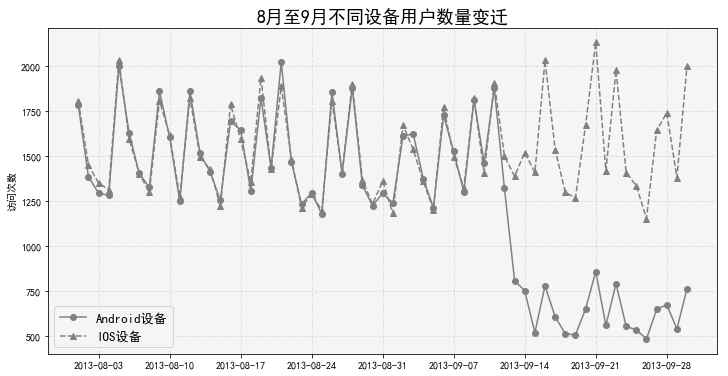

In [75]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('whitesmoke')
# 画出Android设备的时间序列图
plt.plot(device_user_count.user_id.Android, '-o', color='grey', label='Android设备')
plt.plot(device_user_count.user_id.iOS, '--^', color='gray', label='IOS设备')
plt.title('8月至9月不同设备用户数量变迁', fontsize=18)
plt.ylabel('访问次数')
plt.legend(fontsize=13, facecolor='whitesmoke')
plt.grid(linestyle='--', linewidth=1, alpha=0.3)
plt.show()

上图横轴表示访问时间，纵轴表示访问次数，两条曲线分别表示Android设备和IOS设备访问次数随时间的变化。由上图可看出，IOS设备的用户访问数随时间变化无明显变化，而Android设备在9月第二周急剧减少，随后保持相对稳定。那么**在9月的第二周发生了什么导致使用Android设备的用户数量急剧减少**。

## 6 解决对策 

回顾之前提出的假设：
- **《黑猫拼图》游戏用户数量和上月相比减少了（事实）**
- **某些用户群体的用户数减少了（假设）**
- **针对该用户群体制定相应的策略，使用户数量回到上月相同的水平（解决方案）**

根据上述假设，将整个分析过程整理如下：
- **《黑猫拼图》游戏用户数量和上月相比减少了（事实)**
- **使用Android设备的用户群数量显著减少了（事实）**
- **弄清楚Android设备的用户群为什么减少了，并制定相应的策略，使用户数回到上月水平（确信度较高的解决策略）**

根据分析结果，和游戏开发部分沟通后，发现9月12日Android版本应用进行了一次版本升级。给其看了数据分析报告后，被告知，已确认某些机型在测试报告中没有问题，但是不能确定旧机型是否也能通过测试。于是将用户数量减少的Android机型导出，并再度咨询开发部的意见，发现这部分机型的共同特点是都安装了旧版本的Android系统。当这些机型的系统升级后，用户就无法登录游戏，于是研发部门紧急修复了这个版本的系统。